In [1]:
#Samuel Asong_Case Study_Cohort 7_ 2024-04-27

# `Business Understanding`

Train a machine learning model to predict whether a customer is male or female

# `Data Understanding`

## Importation of all necessary packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')

Load Libraries-Done


## Read Data

In [3]:
#  This code reads the csv file into a DataFrame named df, ready for further data analysis or manipulation.
#  Import the dollar tree data

df = pd.read_csv("dollar_tree.csv")
df = pd.DataFrame(df)
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [4]:
# Getting Info about the Data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
# Getting Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


Weak Positive Correlations:
Year and Customer Age: 0.0499
Customer Age and Column1: 0.0012
Year and Column1: -0.0253
Moderate Negative Correlations:
Quantity and Unit Cost: -0.3125
Quantity and Unit Price: -0.3241
Quantity and Column1: -0.0247
Strong Positive Correlations:
Cost and Revenue: 0.9791 (indicating a very strong positive relationship)
Other Correlations:
Some other correlations, such as those involving 'Unit Cost', 
'Unit Price', and 'Cost', show moderate positive correlations but
not as strong as the correlation between 'Cost' and 'Revenue'.

In [6]:

import pandas as pd
import numpy as np



# Assuming your DataFrame is named df
# Drop rows with NaN or infinite values in 'Year' and 'Month' columns
df1 = df.dropna(subset=['Year', 'Month'])
df1 = df1.replace([np.inf, -np.inf], np.nan)

# Convert 'Year' column to integers
df1['Year'] = df1['Year'].astype(int)

# Convert 'Month' column to month numbers
df1['Month'] = pd.to_datetime(df1['Month'], format='%B', errors='coerce').dt.month



# Display the updated DataFrame
print(df1)


       index       Date  Year  Month  Customer Age Customer Gender  \
0          0  2/19/2016  2016      2          29.0               F   
1          1  2/20/2016  2016      2          29.0               F   
2          2  2/27/2016  2016      2          29.0               F   
3          3  3/12/2016  2016      3          29.0               F   
4          4  3/12/2016  2016      3          29.0               F   
...      ...        ...   ...    ...           ...             ...   
34861  34861  3/22/2015  2015      3          38.0               M   
34862  34862   2/7/2016  2016      2          38.0               M   
34863  34863  3/13/2015  2015      3          38.0               M   
34864  34864   4/5/2015  2015      4          38.0               M   
34865  34865  8/30/2015  2015      8          38.0               M   

             Country              State Product Category     Sub Category  \
0      United States         Washington      Accessories  Tires and Tubes   
1    

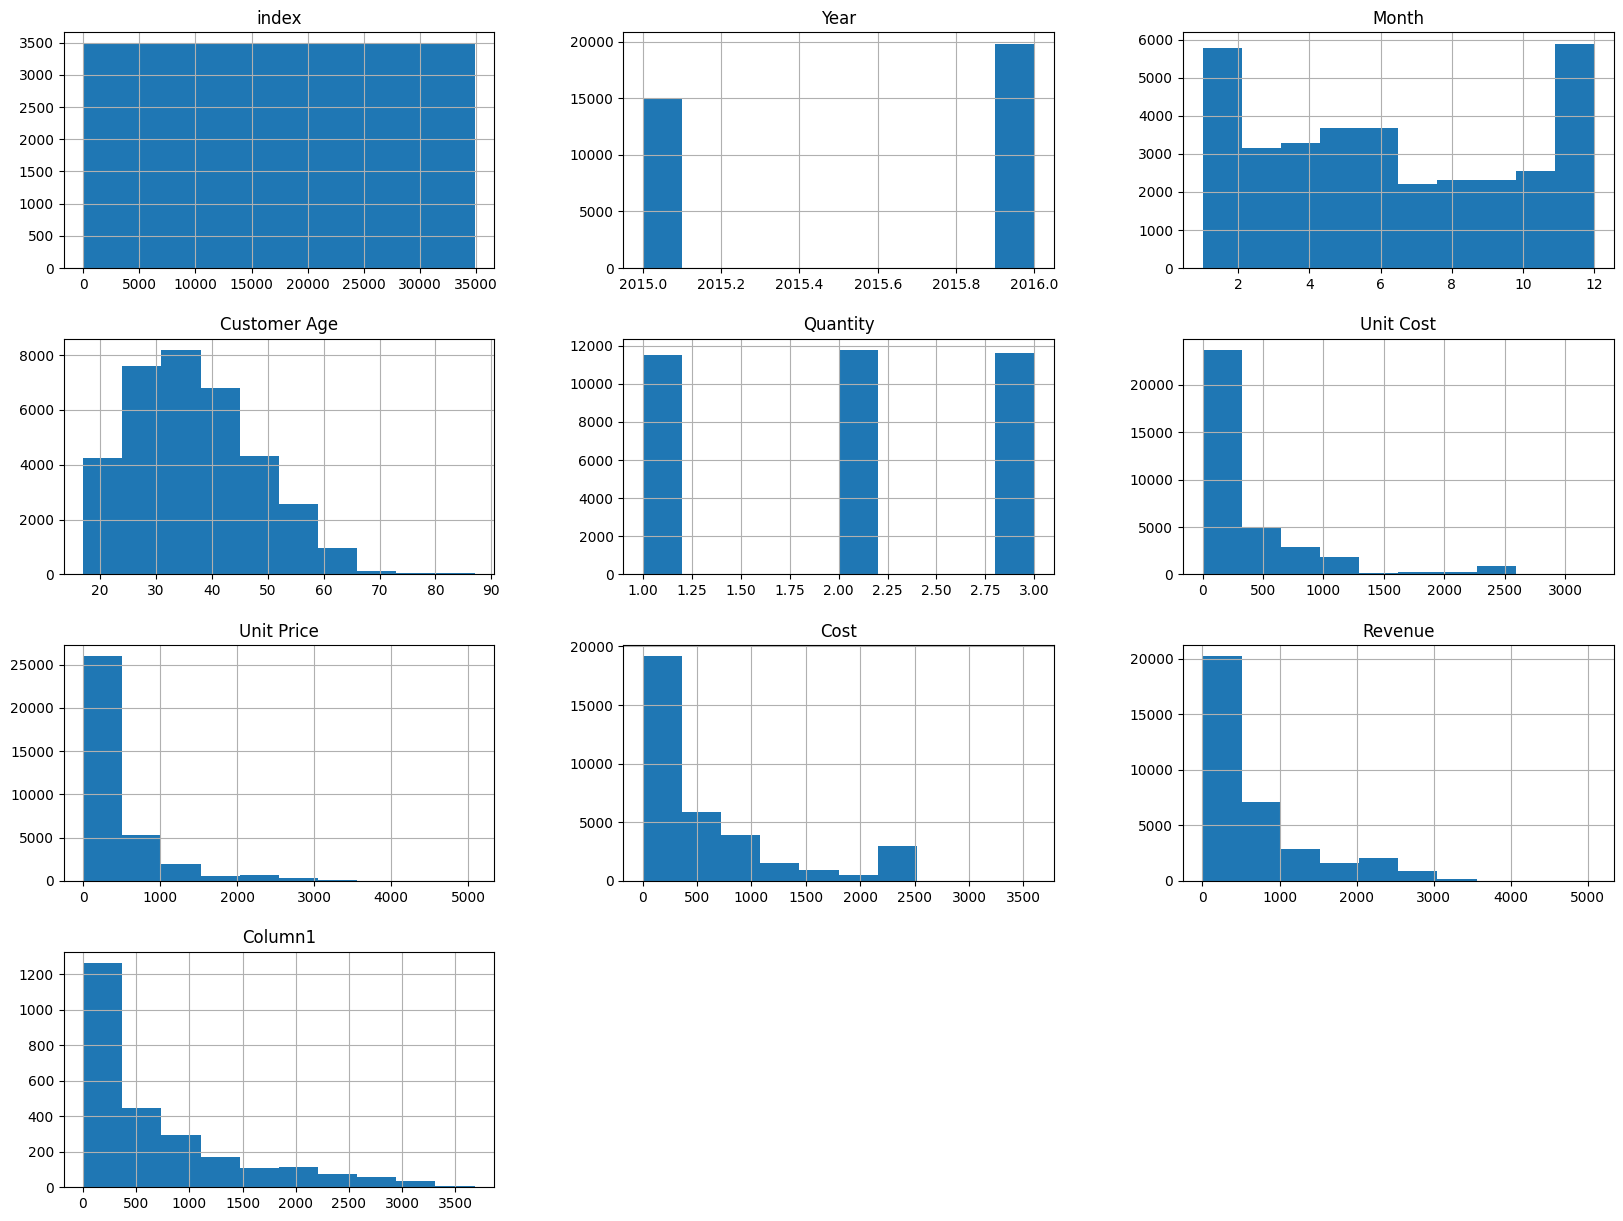

In [7]:
# Distribution of the variables

df1.hist(figsize=(20,15));


Revenue    Axes(0.125,0.11;0.775x0.77)
dtype: object

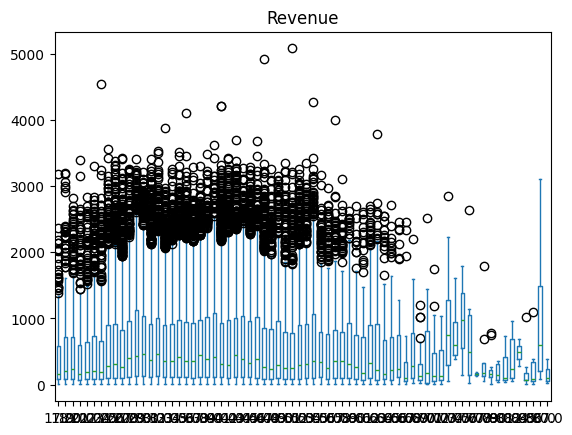

In [8]:
# Insert Boxplots

(
     df1
     # A box plot of Fireplace against Sales Price
     .plot.box(column='Revenue', by='Customer Age')
)


Revenue    Axes(0.125,0.11;0.775x0.77)
dtype: object

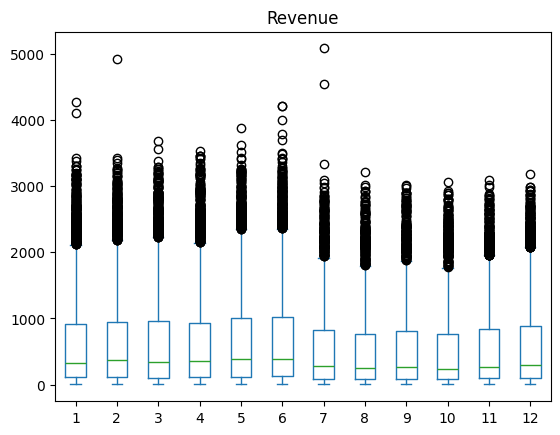

In [9]:
# Insert Boxplots





(
     df1
        # A box plot of Fireplace against Sales Price
       .plot.box(column='Revenue', by='Month')
)

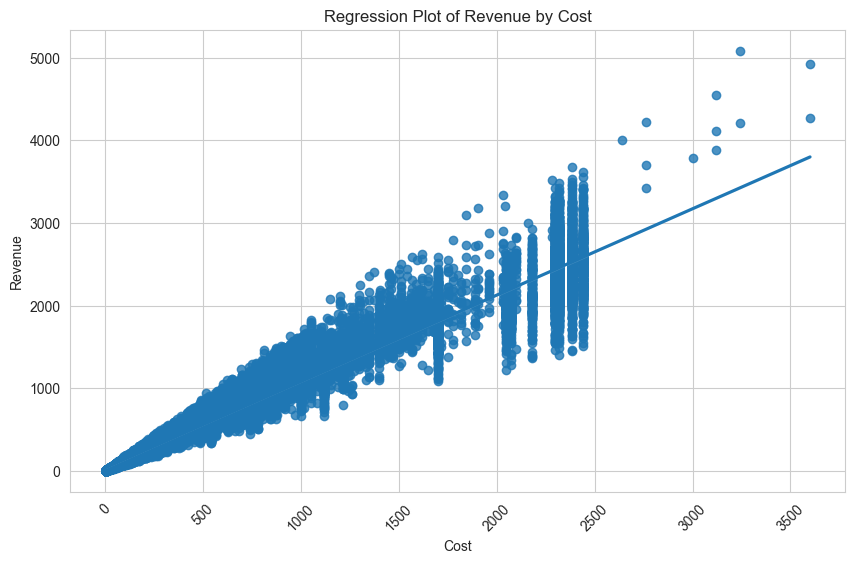

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


# Set the style of seaborn
sns.set_style("whitegrid")
# Now, let's plot a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Cost', y='Revenue', data=df)
plt.title('Regression Plot of Revenue by Cost')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()





In [11]:
# Showing correlation of the Data

# Correlations

# Pearson Correlation
(
     df1
    # Run correlation
    .corr(numeric_only=True)
    # style the corr matrix
    .style
    .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,index,Year,Month,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,0.012018,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083341,-0.145997
Year,0.003961,1.000000,-0.810662,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Month,0.012018,-0.810662,1.000000,-0.046940,-0.000925,-0.018384,-0.051448,-0.019345,-0.058461,-0.002966
Customer Age,-0.045523,0.049873,-0.046940,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,-0.000925,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,-0.018384,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,-0.051448,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,-0.019345,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083341,-0.025361,-0.058461,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,-0.002966,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


# `Data Preparation`

## Data Cleaning

In [12]:
#showing the null values in the dataframe
df.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [13]:
# Filling missing values with the mode value
mode_values = df.mode().iloc[0] 
df = df.fillna(mode_values)
df


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,51.0
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,51.0
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,51.0
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,51.0
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,51.0
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,51.0
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,51.0
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,51.0


In [14]:
# Get unique count for each variable
df.nunique()

index               34867
Date                  576
Year                    2
Month                  12
Customer Age           70
Customer Gender         2
Country                 4
State                  45
Product Category        3
Sub Category           17
Quantity                3
Unit Cost             882
Unit Price           5175
Cost                  417
Revenue              3023
Column1              1281
dtype: int64

In [15]:
df.isnull().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Column1             0
dtype: int64

In [16]:
# Dropping irrelevant Columns permanently

#columns_to_drop = ['index', 'Date','Column1','Year','Month']
#df.drop(columns_to_drop, axis=1, inplace=True)
#df

In [17]:
# Get unique count for each variable
df.nunique()

index               34867
Date                  576
Year                    2
Month                  12
Customer Age           70
Customer Gender         2
Country                 4
State                  45
Product Category        3
Sub Category           17
Quantity                3
Unit Cost             882
Unit Price           5175
Cost                  417
Revenue              3023
Column1              1281
dtype: int64

Divide data into input and output

In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Customer Gender'])
y = df['Customer Gender']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (27893, 15)
X_test shape: (6974, 15)
y_train shape: (27893,)
y_test shape: (6974,)


## Encoding

### 1. Encode the target column (the labels)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
df['Customer Gender'] = encoder.fit_transform(df['Customer Gender'])
# Encode other categorical columns if needed

# Display the first few rows to check encoding
print(df.head())


   index       Date    Year     Month  Customer Age  Customer Gender  \
0      0  2/19/2016  2016.0  February          29.0                0   
1      1  2/20/2016  2016.0  February          29.0                0   
2      2  2/27/2016  2016.0  February          29.0                0   
3      3  3/12/2016  2016.0     March          29.0                0   
4      4  3/12/2016  2016.0     March          29.0                0   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0     51.0  
1     

In [20]:
# Dropping irrelevant Columns permanently

columns_to_drop = ['index', 'Date','Column1','Year','Month']
df.drop(columns_to_drop, axis=1, inplace=True)
df

,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,29.0,0,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000
1,29.0,0,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000
2,29.0,0,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000
3,29.0,0,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000
4,29.0,0,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000
...,...,...,...,...,...,...,...,...,...,...,...
34862,38.0,1,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000
34863,38.0,1,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000
34864,38.0,1,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000
34865,38.0,1,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000


In [21]:
# The above columns were dropped because, Index is a repeatition of index column in Data set, Date , Month and Year
# could not be used in running Chi-Square Test <=0.05, Corretion Test >0.01 and Anova test <=0.05,
# All the above failed and gave error messages even though they were encoded in Categorical columns hence, 
# dropping gave way to Test being performed succesfully below from conclusion in Decision Tree Below.

In [22]:
### 2. Encode categorical columns

In [23]:
from sklearn.preprocessing import LabelEncoder

# categorical columns to encode
categorical_columns = ['Country', 'State', 'Product Category', 'Sub Category']

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
       # Display the first few rows to check encoding
print(df.head())

   Customer Age  Customer Gender  Country  State  Product Category  \
0          29.0                0        3     42                 0   
1          29.0                0        3     42                 2   
2          29.0                0        3     42                 0   
3          29.0                0        3     42                 0   
4          29.0                0        3     42                 0   

   Sub Category  Quantity  Unit Cost  Unit Price   Cost  Revenue  
0            14       1.0      80.00  109.000000   80.0    109.0  
1             6       2.0      24.50   28.500000   49.0     57.0  
2            14       3.0       3.67    5.000000   11.0     15.0  
3            14       2.0      87.50  116.500000  175.0    233.0  
4            14       3.0      35.00   41.666667  105.0    125.0  


In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Customer Gender'])  # Features (exclude the target variable)
y = df['Customer Gender']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27893, 10)
X_test shape: (6974, 10)
y_train shape: (27893,)
y_test shape: (6974,)


In [25]:
#Chi-Square Test:

In [26]:
from sklearn.feature_selection import chi2, SelectKBest

# Perform Chi-Square test for feature selection
selector_chi2 = SelectKBest(chi2, k='all')
X_train_chi2 = selector_chi2.fit_transform(X_train, y_train)

# Get selected feature indices
selected_chi2_indices = selector_chi2.get_support(indices=True)
selected_chi2_features = X_train.columns[selected_chi2_indices]

# Drop non-selected features from X_train and X_test
X_train_selected_chi2 = X_train[selected_chi2_features]
X_test_selected_chi2 = X_test[selected_chi2_features]

# Display selected features from Chi-Square test
print("Selected features from Chi-Square test:", selected_chi2_features)


Selected features from Chi-Square test: Index(['Customer Age', 'Country', 'State', 'Product Category', 'Sub Category',
       'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue'],
      dtype='object')


In [27]:
#Correlation Test:

In [28]:
from scipy.stats import pearsonr

# Calculate correlation coefficients between numerical features and target variable
correlation_values = {}
for column in X_train_selected_chi2.columns:
    if X_train_selected_chi2[column].dtype != 'object':  # Only consider numerical columns
        correlation, _ = pearsonr(X_train_selected_chi2[column], y_train)
        correlation_values[column] = abs(correlation)

# Drop features with correlation coefficients less than 0.01
selected_correlation_features = [feature for feature, correlation in correlation_values.items() if correlation >= 0.01]

# Display selected features from Correlation test
print("Selected features from Correlation test:", selected_correlation_features)


Selected features from Correlation test: ['Customer Age', 'Country', 'Quantity']


In [29]:
#ANOVA Test:

In [30]:
from sklearn.feature_selection import f_classif

# Perform ANOVA test for feature selection
selector_anova = SelectKBest(score_func=f_classif, k='all')
X_train_anova = selector_anova.fit_transform(X_train_selected_chi2, y_train)

# Get selected feature indices
selected_anova_indices = selector_anova.get_support(indices=True)
selected_anova_features = X_train_selected_chi2.columns[selected_anova_indices]

# Drop non-selected features from X_train_selected_chi2 and X_test_selected_chi2
X_train_selected_anova = X_train_selected_chi2[selected_anova_features]
X_test_selected_anova = X_test_selected_chi2[selected_anova_features]

# Display selected features from ANOVA test
print("Selected features from ANOVA test:", selected_anova_features)



Selected features from ANOVA test: Index(['Customer Age', 'Country', 'State', 'Product Category', 'Sub Category',
       'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue'],
      dtype='object')


In [31]:
#Train Decision Tree Classifier:

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train_selected_anova, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_selected_anova)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5174935474620017
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      3409
           1       0.53      0.53      0.53      3565

    accuracy                           0.52      6974
   macro avg       0.52      0.52      0.52      6974
weighted avg       0.52      0.52      0.52      6974



classification results show an accuracy of approximately 51.75%, with precision, 
recall, and F1-score around 51-53% for both classes. Here's a summary:

Precision: The proportion of true positive predictions out of all positive predictions 
is around 51% for both classes.
Recall: The proportion of true positive predictions out of all actual positives 
is around 51-53% for both classes.
F1-score: The harmonic mean of precision and recall is around 51-53% for both classes.

### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [33]:
df

,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,29.0,0,3,42,0,14,1.0,80.00,109.000000,80.0,109.000000
1,29.0,0,3,42,2,6,2.0,24.50,28.500000,49.0,57.000000
2,29.0,0,3,42,0,14,3.0,3.67,5.000000,11.0,15.000000
3,29.0,0,3,42,0,14,2.0,87.50,116.500000,175.0,233.000000
4,29.0,0,3,42,0,14,3.0,35.00,41.666667,105.0,125.000000
...,...,...,...,...,...,...,...,...,...,...,...
34862,38.0,1,0,12,1,10,2.0,1160.00,985.500000,2320.0,1971.000000
34863,38.0,1,0,12,1,10,1.0,2049.00,1583.000000,2049.0,1583.000000
34864,38.0,1,0,12,1,10,3.0,683.00,560.666667,2049.0,1682.000000
34865,38.0,1,0,12,1,10,1.0,2320.00,1568.000000,2320.0,1568.000000


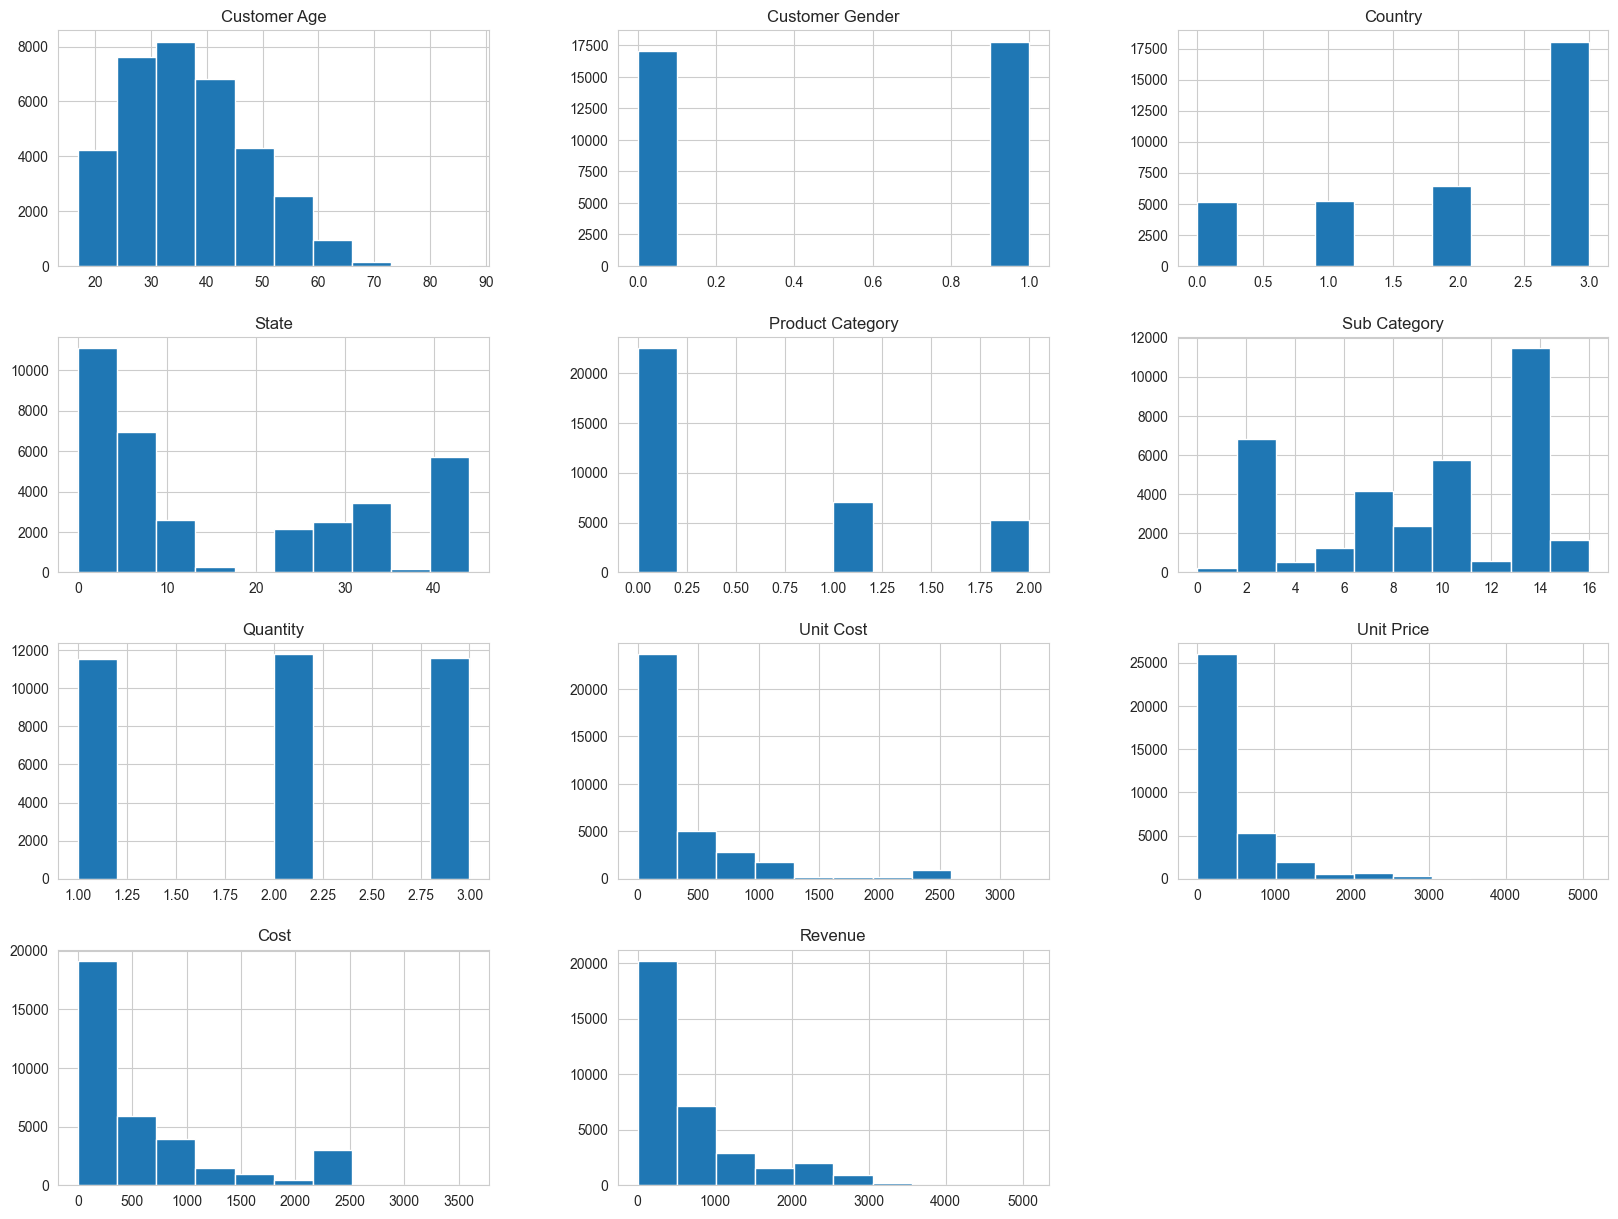

In [34]:
# Distribution of the variables

df.hist(figsize=(20,15));

# `Modeling`

In [35]:
#Model Selection:

# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Accuracy of KNN: 0.5041583022655578
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      3409
           1       0.51      0.52      0.52      3565

    accuracy                           0.50      6974
   macro avg       0.50      0.50      0.50      6974
weighted avg       0.50      0.50      0.50      6974



In [36]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression classifier
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression:", accuracy_log_reg)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Accuracy of Logistic Regression: 0.5067393174648696
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.49      0.26      0.34      3409
           1       0.51      0.74      0.61      3565

    accuracy                           0.51      6974
   macro avg       0.50      0.50      0.47      6974
weighted avg       0.50      0.51      0.48      6974



In [37]:
#Naïve Bayes:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naïve Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate Naïve Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naïve Bayes:", accuracy_nb)
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb))


Accuracy of Naïve Bayes: 0.5064525379982793
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.49      0.25      0.33      3409
           1       0.51      0.75      0.61      3565

    accuracy                           0.51      6974
   macro avg       0.50      0.50      0.47      6974
weighted avg       0.50      0.51      0.47      6974



# `Evaluation`

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Initialize and train Logistic Regression classifier
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression:", accuracy_log_reg)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Initialize and train Naïve Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate Naïve Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naïve Bayes:", accuracy_nb)
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb))


Accuracy of KNN: 0.5041583022655578
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      3409
           1       0.51      0.52      0.52      3565

    accuracy                           0.50      6974
   macro avg       0.50      0.50      0.50      6974
weighted avg       0.50      0.50      0.50      6974

Accuracy of Logistic Regression: 0.5067393174648696
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.49      0.26      0.34      3409
           1       0.51      0.74      0.61      3565

    accuracy                           0.51      6974
   macro avg       0.50      0.50      0.47      6974
weighted avg       0.50      0.51      0.48      6974

Accuracy of Naïve Bayes: 0.5064525379982793
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.49      0.25      0.3

Based on the accuracy scores and the classification reports, it seems that all three classifiers
(KNN, Logistic Regression, and Naïve Bayes) have similar 
performance in terms of accuracy and F1-score for predicting gender based on the dataset.

The accuracy scores for KNN, Logistic Regression, 
    and Naïve Bayes are approximately 0.504, 0.507, and 0.506, respectively.
The F1-scores for predicting class 1 (Female) are 
around 0.52 for KNN, 0.61 for Logistic Regression, and 0.61 for Naïve Bayes.

Plot the confusion Matrix using  `matplotlib` and or `seaborn`

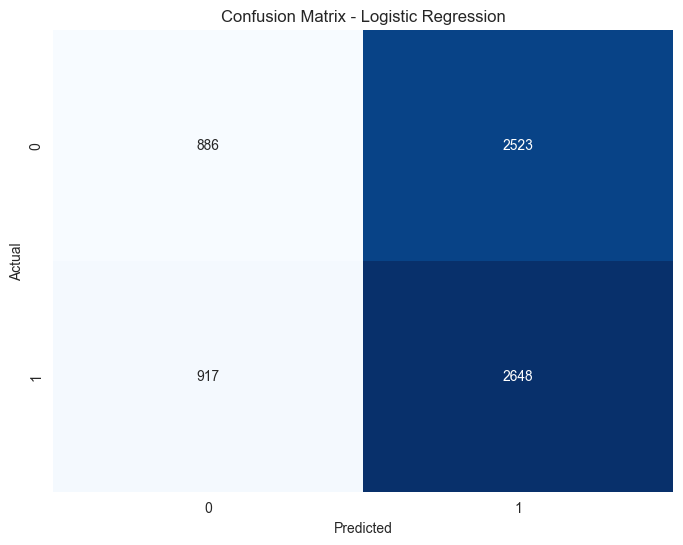

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### Build a classification Report

In [40]:
from sklearn.metrics import classification_report

# Build the classification report for Logistic Regression
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
print("Classification Report - Logistic Regression:")
print(classification_rep_log_reg)


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.49      0.26      0.34      3409
           1       0.51      0.74      0.61      3565

    accuracy                           0.51      6974
   macro avg       0.50      0.50      0.47      6974
weighted avg       0.50      0.51      0.48      6974



Precision measures the proportion of true positive predictions among all positive predictions. 
For class 0 (Male), the precision is 0.49, and for class 1 (Female), the precision is 0.51. 
This indicates that the model is better at predicting class 1 (Female) 
than class 0 (Male) but still has room for improvement.
Recall (also known as sensitivity or true positive rate) measures the proportion of actual positives 
that were correctly identified by the model. For class 0, the recall is 0.26, 
and for class 1, it's 0.74. This means the model has a higher recall 
for predicting class 1 (Female) compared to class 0 (Male).

Overall, the Logistic Regression model shows better performance in predicting
class 1 (Female) compared to class 0 (Male), as indicated by higher precision, recall, 
and F1-score for class 1. However, the model's overall accuracy is moderate, 
suggesting that further optimization or exploration of other models may be beneficial.